# Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from their GitHub repository.

The data has several columns, including the following:

RespondentID — An anonymized ID for the respondent (person taking the survey)


Gender — the respondent's gender


Age — the respondent's age


Household Income — the respondent's income


Education — the respondent's education level


Location (Census Region) — the respondent's location


Have you seen any of the 6 films in the Star Wars franchise? — a Yes or No response


Do you consider yourself to be a fan of the Star Wars film franchise? — a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

# 1. Read the Dataset into a DataFrame

In [1]:
import pandas as pd #import the library

star_wars = pd.read_csv('star_wars.csv', encoding = 'ISO-8859-1')

star_wars.head(10) #explore the first 10 rows of the data

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [2]:
star_wars.columns  #Review the columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

# 2. Cleaning the data

Take a look at the next two columns:

Have you seen any of the 6 films in the Star Wars franchise?
Do you consider yourself to be a fan of the Star Wars film franchise?
Both represent Yes/No questions. They can also be NaN where a respondent chooses not to answer a question. We can use the pandas.Series.value_counts() method on a series to see all of the unique values in a column, along with the total number of times each value appears.

Both columns are currently string types, because the main values they contain are Yes and No. We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values True, False, and NaN. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

In [3]:
#convertine the columns to the Boolean type
yes_no = {'Yes': True, 'No':False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [4]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:

Which of the following Star Wars films have you seen? Please select all that apply. — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.


Unnamed: 4 — whether or not the respondent saw Star Wars: Episode II Attack of the Clones.


Unnamed: 5 — whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.


Unnamed: 6 — whether or not the respondent saw Star Wars: Episode IV A New Hope.


Unnamed: 7 — whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.


Unnamed: 8 — whether or not the respondent saw Star Wars: Episode VI Return of the Jedi

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and NaN in the mapping dictionary.

In [6]:
# Some of the strings in our rows have double spaces, so we'll transform them to single spaces
import numpy as np
star_wars = star_wars.replace(r'\s+', ' ', regex=True)

# Map string values to boolean values using for loop
movies_map = {
    'Star Wars: Episode I The Phantom Menace': True,
    np.nan:False,
    'Star Wars: Episode II Attack of the Clones':True,
    'Star Wars: Episode III Revenge of the Sith':True,
    'Star Wars: Episode IV A New Hope':True,
    'Star Wars: Episode V The Empire Strikes Back':True,
    'Star Wars: Episode VI Return of the Jedi':True
    }
    
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movies_map) 

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [8]:
# Rename columns
star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_Ep_1',
    'Unnamed: 4':'seen_Ep_2',
    'Unnamed: 5':'seen_Ep_3',
    'Unnamed: 6':'seen_Ep_4',
    'Unnamed: 7':'seen_Ep_5',
    'Unnamed: 8':'seen_Ep_6'})

# Check to see if it worked
print(star_wars.columns[3:9])
star_wars.head()

Index(['seen_Ep_1', 'seen_Ep_2', 'seen_Ep_3', 'seen_Ep_4', 'seen_Ep_5',
       'seen_Ep_6'],
      dtype='object')


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_Ep_1,seen_Ep_2,seen_Ep_3,seen_Ep_4,seen_Ep_5,seen_Ep_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
Unnamed: 10 — How much the respondent liked Star Wars: Episode II Attack of the Clones
Unnamed: 11 — How much the respondent liked Star Wars: Episode III Revenge of the Sith
Unnamed: 12 — How much the respondent liked Star Wars: Episode IV A New Hope
Unnamed: 13 — How much the respondent liked Star Wars: Episode V The Empire Strikes Back
Unnamed: 14 — How much the respondent liked Star Wars: Episode VI Return of the Jedi
Fortunately, these columns don't require much cleaning. We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [9]:
# converting the columns to numeric type

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [11]:
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
    'Unnamed: 10':'ranking_2',
    'Unnamed: 11':'ranking_3',
    'Unnamed: 12':'ranking_4',
    'Unnamed: 13':'ranking_5',
    'Unnamed: 14':'ranking_6'})
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_Ep_1,seen_Ep_2,seen_Ep_3,seen_Ep_4,seen_Ep_5,seen_Ep_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


#                       Analysis

# 3. Finding the Highest-Ranked Movie

Now that our data has been cleaned we can analyze and find connections. First thing we'll do is find the average rating of each movie

In [14]:
star_wars[star_wars.columns[9:15]].mean().sort_values(ascending = False)

ranking_3    4.341317
ranking_2    4.087321
ranking_1    3.732934
ranking_4    3.272727
ranking_6    3.047847
ranking_5    2.513158
dtype: float64

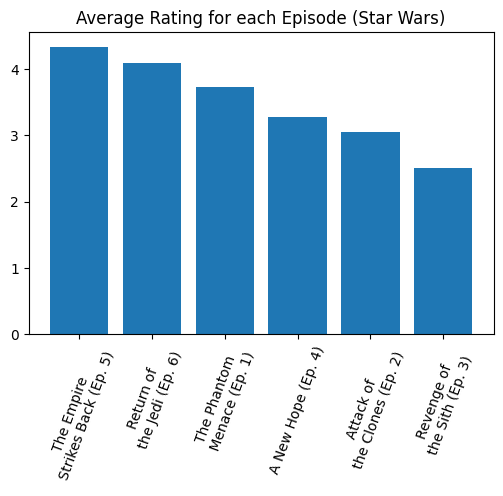

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(6),star_wars[star_wars.columns[9:15]].mean().sort_values(ascending = False))
plt.xticks(range(6), labels=['The Empire \n Strikes Back (Ep. 5)', 'Return of \n the Jedi (Ep. 6)', 
                            'The Phantom \n Menace (Ep. 1)', 'A New Hope (Ep. 4)', 
                            'Attack of \n the Clones (Ep. 2)',
                            'Revenge of \n the Sith (Ep. 3) ', 
                            ], rotation=70)
plt.title('Average Rating for each Episode (Star Wars)')
plt.show()

We can see that episode 5, or The Empire Strikes Back, was the highest rated movie. This is most likely due to the nostalgia of it as it was one of the first Star Wars movies produced

In [28]:
sum_bar = star_wars[star_wars.columns[3:9]].sum().sort_values(ascending = False)

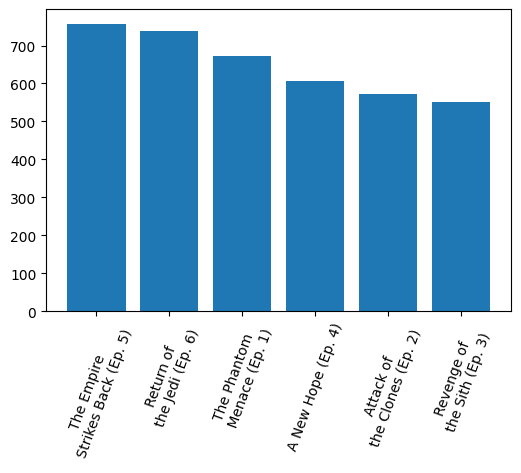

In [31]:
plt.bar(range(6),sum_bar)
plt.xticks(range(6), labels=['The Empire \n Strikes Back (Ep. 5)', 'Return of \n the Jedi (Ep. 6)', 
                            'The Phantom \n Menace (Ep. 1)', 'A New Hope (Ep. 4)', 
                            'Attack of \n the Clones (Ep. 2)',
                            'Revenge of \n the Sith (Ep. 3) ', 
                            ], rotation=70)
plt.title()
plt.show()

We can see that The Empire Strikes Back is the most viewed movie ontop of being the top rated movie. After doing some surface level research it seems to be due to the emotional investment between the audience and the characters, where the film left the audience on the edge while the next movie was produced.

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

Do you consider yourself to be a fan of the Star Wars film franchise? — True or False
Do you consider yourself to be a fan of the Star Trek franchise? — Yes or No
Gender — Male or Female

In [34]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
males[males.columns[9:15]].mean().sort_values(ascending= False)


ranking_3    4.274882
ranking_2    4.224586
ranking_1    4.037825
ranking_6    3.002364
ranking_4    2.997636
ranking_5    2.458629
dtype: float64

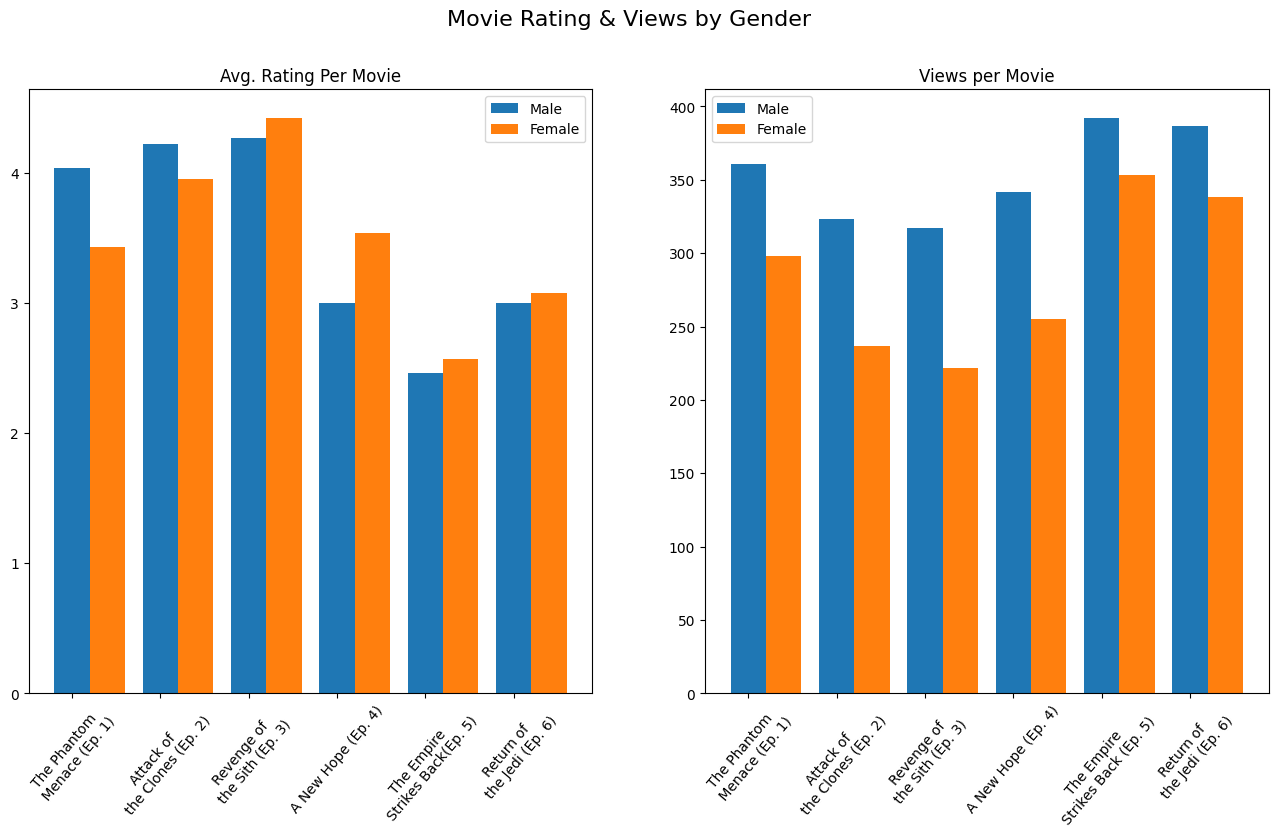

In [46]:
plt.figure(figsize=(16, 8))
plt.suptitle('Movie Rating & Views by Gender', fontsize=16)

# Avg. Rating Per Movie Graph
a = np.arange(len(males.columns[9:15]))
y = 0.4

plt.subplot(1,2,1)
p1 = plt.bar(a, males[males.columns[9:15]].mean().round(2), label='Male', width=y)
p2 = plt.bar(a + y, females[females.columns[9:15]].mean().round(2), label='Female', width=y)
plt.xticks(range(6), labels=['The Phantom \n Menace (Ep. 1)', 'Attack of \n the Clones (Ep. 2)',
                            'Revenge of \n the Sith (Ep. 3) ', 'A New Hope (Ep. 4)',
                            'The Empire \n Strikes Back(Ep. 5)', 'Return of \n the Jedi (Ep. 6)'
                            ], rotation=50)
plt.title('Avg. Rating Per Movie')
plt.legend()

# plt.bar_label(p1, label_type='center')
# plt.bar_label(p2, label_type='center')

# Views Per Movie Graph
z = np.arange(len(females.columns[3:9]))

plt.subplot(1,2,2)
p3 = plt.bar(z, males[males.columns[3:9]].sum(), label='Male', width=y)
p4 = plt.bar(z + y, females[females.columns[3:9]].sum(), label='Female', width=y)
plt.legend()
plt.xticks(range(6), labels=['The Phantom \n Menace (Ep. 1)', 'Attack of \n the Clones (Ep. 2)',
                            'Revenge of \n the Sith (Ep. 3) ', 'A New Hope (Ep. 4)',
                            'The Empire \n Strikes Back (Ep. 5)', 'Return of \n the Jedi (Ep. 6)'
                            ], rotation=50)
plt.title('Views per Movie')

# plt.bar_label(p3, label_type='center')
# plt.bar_label(p4, label_type='center')

plt.show()